In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
os.chdir("../../005_src")

from config import *
print (os.getenv('CONDA_PREFIX'))

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Plotting import successful
Functions Data Adjustments import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

/usr/prakt/s0014/anaconda3/en

In [2]:
device = cudaOverview()

CUDA available
Number of Devices: 1
ID current Device NVIDIA GeForce GTX 1050 Ti: 0
	current GPU memory usage by tensors in bytes:0
	current GPU memory managed by caching allocator in bytes:0


In [3]:
filenames = sorted(glob.glob(f"{OUTPUT_DIR}"+"/**/*"+f"*training_parameters.pkl", recursive=True))
all_dict = [pkl.load(open(this_file,"rb"))for this_file in filenames]
#all_dict = [pkl.loads(memoryview(open(this_file,"rb"))) for this_file in filenames]

df = pd.DataFrame(all_dict)

at 20h42m03s imported models:
['GCN_HL01', 'GCN_HL02', 'GCN_HL03']
edges_attr=True
at 20h42m03s imported models:
['GCN_HL01_relu', 'GCN_HL01_tanh', 'GCN_HL02_relu', 'GCN_HL02_tanh', 'GCN_HL03_relu', 'GCN_HL03_tanh']
edges_attr=True
at 20h42m03s imported models:
['GCN_HL01_leaky_relu', 'GCN_HL01_relu', 'GCN_HL01_tanh', 'GCN_HL02_leaky_relu', 'GCN_HL02_relu', 'GCN_HL02_tanh', 'GCN_HL03_leaky_relu', 'GCN_HL03_relu', 'GCN_HL03_tanh']
at 20h42m04s imported models:
['GCN_HL01_bn_relu', 'GCN_HL01_bn_tanh', 'GCN_HL02_bn_relu', 'GCN_HL02_bn_tanh', 'GCN_HL03_bn_relu', 'GCN_HL03_bn_tanh']


In [4]:
df.columns

Index(['run_time', 'model', 'random_seed', 'train_size', 'batch_size',
       'Nepochs', 'save_every', 'transformstat', 'plotstat', 'printstat',
       'input_file_name', 'num_rows_training', 'num_rows_validation',
       'num_rows_test', 'exclude_yaw', 'concatenatestat', 'paddingstat',
       'size_input', 'size_output', 'model_architecture', 'tloss_path',
       'criterion', 'optimizer', 'final_loss', 'train', 'val', 'lr',
       'final_train_loss', 'final_val_loss', 'intentionstat', 'model_path',
       'train_losses_path', 'val_losses_path', 'lr_path', 'max_num_veh',
       'sim_duration_timesteps', 'figure_paths', 'shuttle_train_frame',
       'shuttle_val_frame', 'hidden_layers_sizes', 'reduction', 'scheduler',
       'run_date', 'combo', 'use_edges_attr', 'activation_function',
       'epoch14000_train_loss', 'epoch14000_final_val_loss',
       'epoch28000_train_loss', 'epoch28000_final_val_loss',
       'epoch2500_train_loss', 'epoch2500_final_val_loss',
       'epoch5000_train

# TABLE TRAININGS OVERVIEW

here all the trainings completed succcessfully with a txt file 

In [5]:
df.scheduler.unique()

array([nan,
       None, 'ReduceLROnPlateau', 'MultiStepLR',
       'CosineAnnealingWarmRestarts', 'NoneType'], dtype=object)

# Comparative overviews

In [6]:
GCN_MODEL = "GCN_010"
MODEL_PATH =os.path.join(OUTPUT_DIR,GCN_MODEL)
MODEL_PATH

'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_010'

## Compare GCN_010

In [7]:
mask = (df.model == GCN_MODEL) #and (df.Nepochs == 5000)
df_top = df[mask][[
                'run_date',
                'run_time', 
                'model',
                'Nepochs',
                'batch_size',
                #'input_file_name',
                #'size_input', 
                #'size_output', 
                'model_architecture', 
                'num_rows_training',

                'criterion', 
                'optimizer', 
                #'reduction',
                'scheduler',

                'final_train_loss', 
                'final_val_loss', 
                #'intentionstat', 
                #'model_path',
                'train_losses_path', 
                'val_losses_path',
            
               #'lr',
                'use_edges_attr',
                'activation_function',
                'combo'
                
                   
           ]]
df_top

,run_date,run_time,model,Nepochs,batch_size,model_architecture,num_rows_training,criterion,optimizer,scheduler,final_train_loss,final_val_loss,train_losses_path,val_losses_path,use_edges_attr,activation_function,combo
35,NaN,09h52m05s,GCN_010,10,1,"GCN(\n (conv1): GCNConv(6, 512)\n (conv2): G...",22478,MSELoss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,346.550892,340.771334,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
36,NaN,10h08m16s,GCN_010,10,1,"GCN(\n (conv1): GCNConv(6, 512)\n (conv2): G...",22478,MSELoss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,346.550892,340.771334,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
37,NaN,10h19m34s,GCN_010,10,1,"GCN(\n (conv1): GCNConv(6, 512)\n (conv2): G...",22478,MSELoss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,346.550892,340.771334,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
38,NaN,10h54m35s,GCN_010,5,4,"GCN(\n (conv1): GCNConv(6, 16)\n (conv2): GC...",22478,L1Loss(),SGD (\nParameter Group 0\n dampening: 0\n ...,NaN,13.171384,13.239552,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
39,NaN,11h13m37s,GCN_010,5,4,"GCN(\n (conv1): GCNConv(6, 16)\n (conv2): GC...",22478,L1Loss(),SGD (\nParameter Group 0\n dampening: 0\n ...,NaN,13.171384,13.239552,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,NaN,19h36m22s,GCN_010,5000,32,"GCN(\n (conv1): GCNConv(6, 256)\n (conv2): G...",200,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,10.618435,14.753873,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
131,NaN,19h41m21s,GCN_010,5000,32,"GCN(\n (conv1): GCNConv(6, 256)\n (conv2): G...",200,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,10.181830,12.673133,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
132,NaN,19h45m52s,GCN_010,5000,32,"GCN(\n (conv1): GCNConv(6, 256)\n (conv2): G...",200,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,8.452588,14.962766,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
133,NaN,19h52m30s,GCN_010,5000,32,"GCN(\n (conv1): GCNConv(6, 256)\n (conv2): G...",200,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,9.636204,16.914471,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN


In [8]:
df_top = df_top.sort_values(by=['final_val_loss'])
df_top#[df_top.batch_size == 1024]

,run_date,run_time,model,Nepochs,batch_size,model_architecture,num_rows_training,criterion,optimizer,scheduler,final_train_loss,final_val_loss,train_losses_path,val_losses_path,use_edges_attr,activation_function,combo
52,NaN,19h01m07s,GCN_010,500,32,"GCN(\n (conv1): GCNConv(6, 16)\n (conv2): GC...",22478,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,9.922551,9.874948,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
51,NaN,17h55m48s,GCN_010,300,16,"GCN(\n (conv1): GCNConv(6, 16)\n (conv2): GC...",22478,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,10.121191,10.074350,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
50,NaN,16h24m23s,GCN_010,500,8,"GCN(\n (conv1): GCNConv(6, 16)\n (conv2): GC...",22478,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,10.148296,10.131301,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
49,NaN,15h40m30s,GCN_010,200,8,"GCN(\n (conv1): GCNConv(6, 16)\n (conv2): GC...",22478,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,10.160096,10.161026,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
55,NaN,07h34m42s,GCN_010,400,32,"GCN(\n (conv1): GCNConv(6, 64)\n (conv2): GC...",22478,L1Loss(),SGD (\nParameter Group 0\n dampening: 0\n ...,NaN,10.438075,10.177323,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,NaN,08h57m35s,GCN_010,15000,64,"GCN(\n (conv1): GCNConv(6, 32)\n (conv2): GC...",1,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,5.200202,513.517029,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
68,NaN,09h55m05s,GCN_010,100000,64,"GCN(\n (conv1): GCNConv(6, 512)\n (conv2): G...",1,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,3.111898,699.888611,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
94,NaN,17h59m22s,GCN_010,50000,256,"GCN(\n (conv1): GCNConv(7, 256)\n (conv2): G...",30,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,7.512332,886.225281,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN
66,NaN,09h33m26s,GCN_010,100000,64,"GCN(\n (conv1): GCNConv(6, 128)\n (conv2): G...",1,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NaN,2.917711,1122.506714,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,NaN,NaN,NaN


In [9]:
best_k = df_top.iloc[0].run_time

Comparing 6 models
possible keys to choose from:
: ['run_date', 'run_time', 'model', 'Nepochs', 'batch_size', 'model_architecture', 'num_rows_training', 'criterion', 'optimizer', 'scheduler', 'final_train_loss', 'final_val_loss', 'train_losses_path', 'val_losses_path', 'use_edges_attr', 'activation_function', 'combo']
min_len=200
not all lists of losses have same length!
they will be plotted according to the minimal length 200
Comparing 6 models
possible keys to choose from:
: ['run_date', 'run_time', 'model', 'Nepochs', 'batch_size', 'model_architecture', 'num_rows_training', 'criterion', 'optimizer', 'scheduler', 'final_train_loss', 'final_val_loss', 'train_losses_path', 'val_losses_path', 'use_edges_attr', 'activation_function', 'combo']
min_len=200
not all lists of losses have same length!
they will be plotted according to the minimal length 200


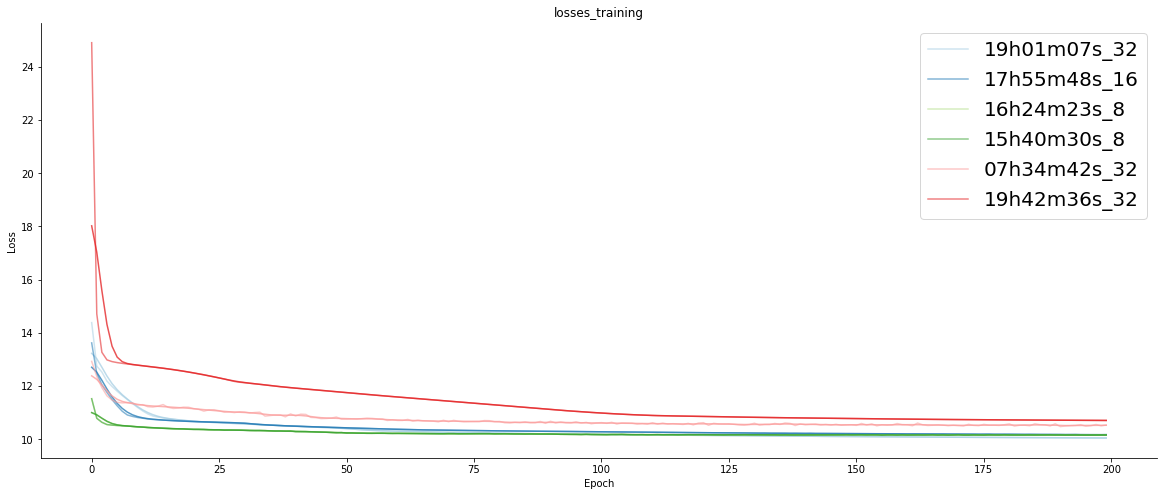

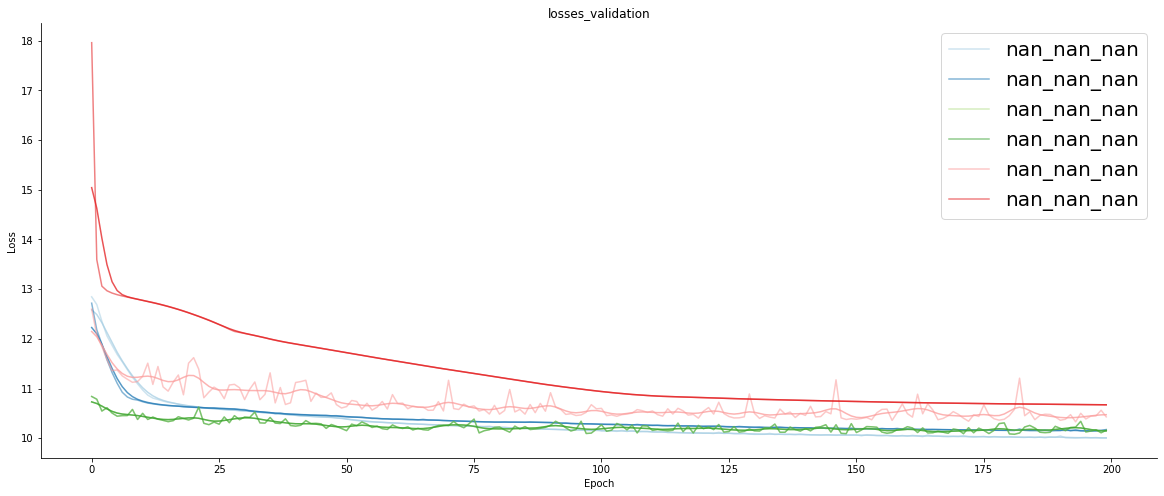

In [10]:
t_losses = {}
TOP = 6
for r in df_top.index[:TOP]:
    t_loss_path = df_top.loc[r]['train_losses_path']
    model_details = df_top.loc[r]
    t_loss_load = pkl.load(open(t_loss_path, 'rb'))
    t_losses[r] = (t_loss_load, model_details.to_dict())
v_losses = {}
for r in df_top.index[:TOP]:
    v_loss_path = df_top.loc[r]['val_losses_path']
    model_details = df_top.loc[r]
    v_loss_load = pkl.load(open(v_loss_path, 'rb'))
    v_losses[r] = (v_loss_load, model_details.to_dict())
fig = compare_losses(
                   t_losses,
                   title_1 = "losses_training",
                   columns = ["run_time","batch_size"],
                     
                   #losses_dict_2 = v_losses,
                   #title_2 = "losses_validation",
                   #columns_2 = ["model","scheduler"],
                   gaussian=True,
                   sigma=2,
                   figsize=(20, 8),
                ) 

fig = compare_losses(
                   v_losses,
                   title_1 = "losses_validation",
                   columns = ["scheduler",'use_edges_attr', "activation_function"],
                     
                   #losses_dict_2 = v_losses,
                   #title_2 = "losses_validation",
                   #columns_2 = ["model","scheduler"],
                   gaussian=True,
                   sigma=2,
                   figsize=(20, 8),
                )  

In [11]:
mask = df.run_time == best_k
print ("-"*80)
print (f"\n {best_k}\n")
print (dict(df[mask]['optimizer']))

architecture = dict(df[mask]['model_architecture'])
print (architecture)
#first_key = list(architecture.keys())[0]
#str(type(architecture[first_key]))[:]
#print (df[mask].T)

--------------------------------------------------------------------------------

 19h01m07s

{52: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)}
{52: GCN(
  (conv1): GCNConv(6, 16)
  (conv2): GCNConv(16, 2)
)}


## details of all models

In [12]:
all_t_losses = {}
for r in df_top.index[:]:
    t_loss_path = df_top.loc[r]['train_losses_path']
    model_details = df_top.loc[r]
    t_loss_load = pkl.load(open(t_loss_path, 'rb'))
    all_t_losses[r] = (t_loss_load, model_details.to_dict())

for v in all_t_losses.values():
    k = v[1]['run_time']
    mask = df.run_time == k #"16h45m18s"
    print ("-"*80)
    print (f"\n>{k}")
    print (f"final training: {df[mask]['final_train_loss'].values}") 
    print (f"final validation: {df[mask]['final_val_loss'].values}\n ")
    
    print (list(df[mask]['batch_size']))
    print (list(df[mask]['scheduler']))
    print (list(df[mask]['optimizer']))
    print (list(df[mask]['model_architecture']))

FileNotFoundError: [Errno 2] No such file or directory: '/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_010/20210716-11h13m37s/20210716-11h13m37sEPOCH_4of5_TEMP__TEMP__training_loss.pkl'

## details of best models

In [ ]:
list(df.columns)

In [13]:
list(t_losses.keys())

[52, 51, 50, 49, 55, 53]

In [16]:
best_combos = {}
for v in t_losses.values():
    k = v[1]['run_time']

    mask = df.run_time == k #"16h45m18s"
    print ("-"*80)
    date = df[mask]['run_date'].values[0]
    print (f"\n>{date}{k}")
    print (f"N epochs: {df[mask]['Nepochs'].values[0]}")
    print (f"num_rows_training: {df[mask]['num_rows_training'].values}") 
    print (f"final training: {df[mask]['final_train_loss'].values}") 
    print (f"final validation: {df[mask]['final_val_loss'].values}\n ")
    
    
    additional_info = {column:df[mask][column].values[0] 
                       for column in list(df.columns)} 
    try: 
        combo =  df[mask]['combo'].values[0]
        combo = [e for e in combo]
        print (combo)
        best_combos[f"{date}{k}"] = [combo,additional_info]
    except Exception as e:
        print (e)
    

--------------------------------------------------------------------------------

>nan19h01m07s
N epochs: 500
num_rows_training: [22478]
final training: [9.92255114]
final validation: [9.87494823]
 
'float' object is not iterable
--------------------------------------------------------------------------------

>nan17h55m48s
N epochs: 300
num_rows_training: [22478]
final training: [10.12119131]
final validation: [10.07435011]
 
'float' object is not iterable
--------------------------------------------------------------------------------

>nan16h24m23s
N epochs: 500
num_rows_training: [22478]
final training: [10.14829627]
final validation: [10.13130056]
 
'float' object is not iterable
--------------------------------------------------------------------------------

>nan15h40m30s
N epochs: 200
num_rows_training: [22478]
final training: [10.16009575]
final validation: [10.16102592]
 
'float' object is not iterable
--------------------------------------------------------------------------

In [17]:
MODEL_PATH

'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_010'

## TO DO THIS NEED TO SAVE THE COMBINATIONS!

In [20]:
#best_combos
#MODEL_PATH

#description = f"{this_date}{ts}"
#dict_best_combos_descr = f"{GCN_MODEL}_best_combos"
#dict_best_combos_path = os.path.join(MODEL_PATH,dict_best_combos_descr)

# store parameters as a pickle
#with open(f'{dict_best_combos_path}.pkl', 'wb') as handle:
    #pkl.dump(best_combos, handle, protocol=pkl.HIGHEST_PROTOCOL)

#print (dict_best_combos_path)

In [19]:
# reload combos

#reloaded_best_combos = pkl.load(open(f'{dict_best_combos_path}.pkl',"rb"))
#for k,v in reloaded_best_combos.items():
    #print ()
    #print (v[0])
    #print ()
    #for kk,vv in v[1].items():
        #print (f"{kk}:{vv}")
    #print (v[1])

In [18]:
#all_combos = [v[0] for k,v in reloaded_best_combos.items()]
#all_combos

In [20]:
# check if the value is in the bunch
